In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive/Skripsi /content/skripsi

In [4]:
import os
import torch
import csv
import shutil
import zipfile
import pandas as pd

from torch import nn, Tensor
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt

import numpy as np
from PIL import Image

import random
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import torchvision
from torchvision import models

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Path to the zip file in Google Drive
zip_file_path = '/content/skripsi/CASME2_Compressed video.zip'

# Path to the directory where the contents will be extracted
extract_dir = '/content/skripsi/CASME2_dataset'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files have been extracted to {extract_dir}")

Files have been extracted to /content/skripsi/CASME2_dataset


In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/CASME2_labels.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

     Subject  Filename Estimated Emotion
0          1  EP02_01f         happiness
1          1   EP03_02            others
2          1   EP04_02            others
3          1   EP04_03            others
4          1   EP04_04            others
..       ...       ...               ...
251       26   EP18_46            others
252       26   EP18_47           disgust
253       26   EP18_49           disgust
254       26   EP18_50           disgust
255       26   EP18_51           disgust

[256 rows x 3 columns]


In [ ]:
# Path to the original dataset folder and label file
dataset_folder = '/content/skripsi/CASME2_dataset'  # Sesuaikan dengan path yang benar
label_file = '/content/skripsi/CASME2_labels.csv'    # Sesuaikan dengan path yang benar

# Path to the new dataset folder where videos will be organized by class
new_dataset_folder = '/content/skripsi/dataset'     # Sesuaikan dengan path yang benar

# Dictionary to store videos grouped by class
class_videos = {}

# Read label file and populate class_videos dictionary
with open(label_file, 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header if exists
    for row in reader:
        subject = row[0]  # Assuming subject is in the first column
        filename = row[1] + '.avi'  # Assuming filename is in the second column and adding .avi extension
        emotion_class = row[2]  # Assuming emotion class is in the third column

        # Construct full path to video
        video_path = None
        for subfolder in os.listdir(dataset_folder):
            subfolder_path = os.path.join(dataset_folder, subfolder)
            if os.path.isdir(subfolder_path):
                potential_video_path = os.path.join(subfolder_path, filename)
                if os.path.exists(potential_video_path):
                    video_path = potential_video_path
                    break

        if video_path is None:
            print(f"File not found: {filename}")
            continue

        # Check if the class key already exists in dictionary
        if emotion_class not in class_videos:
            class_videos[emotion_class] = []

        # Append video path and subject to the corresponding class key
        unique_filename = f"{subject}_{filename}"  # Add subject name in front if filename already exists
        class_videos[emotion_class].append((video_path, unique_filename))

File not found: EP03_14f.avi


In [ ]:
# Create directories based on emotion classes and move videos
for emotion_class, videos in class_videos.items():
    # Create class directory inside the output folder if it doesn't exist
    class_dir = os.path.join(new_dataset_folder, emotion_class)
    os.makedirs(class_dir, exist_ok=True)

    # Move or copy videos to the class directory
    for video_path, unique_filename in videos:
        dest_path = os.path.join(class_dir, unique_filename)

        # Choose either move or copy operation
        shutil.copy(video_path, dest_path)  # Change to shutil.move if you want to move

print("Videos have been organized and saved according to their classes in the dataset folder.")

Videos have been organized and saved according to their classes in the dataset folder.


In [ ]:
dataset_dir = '/content/skripsi/dataset'

In [ ]:
# List all subdirectories (kelas) in the dataset folder
kelas_folders = os.listdir(dataset_dir)

# Dictionary to store the count of videos in each class folder
video_counts = {}

# Iterate through each class folder and count the number of videos
for kelas_folder in kelas_folders:
    class_path = os.path.join(dataset_dir, kelas_folder)
    if os.path.isdir(class_path):
        # Count all files with .avi extension in the class folder
        videos_in_class = [file for file in os.listdir(class_path) if file.endswith('.avi')]
        video_counts[kelas_folder] = len(videos_in_class)

In [ ]:
# Print the counts of videos in each class folder
for kelas_folder, count in video_counts.items():
    print(f"Kelas {kelas_folder}: {count} video")

# If you want to sum all videos in all classes, you can do:
total_videos = sum(video_counts.values())
print(f"Total videos in all classes: {total_videos}")

Kelas happiness: 32 video
Kelas others: 99 video
Kelas disgust: 63 video
Kelas repression: 27 video
Kelas surprise: 25 video
Kelas fear: 2 video
Kelas sadness: 7 video
Total videos in all classes: 255


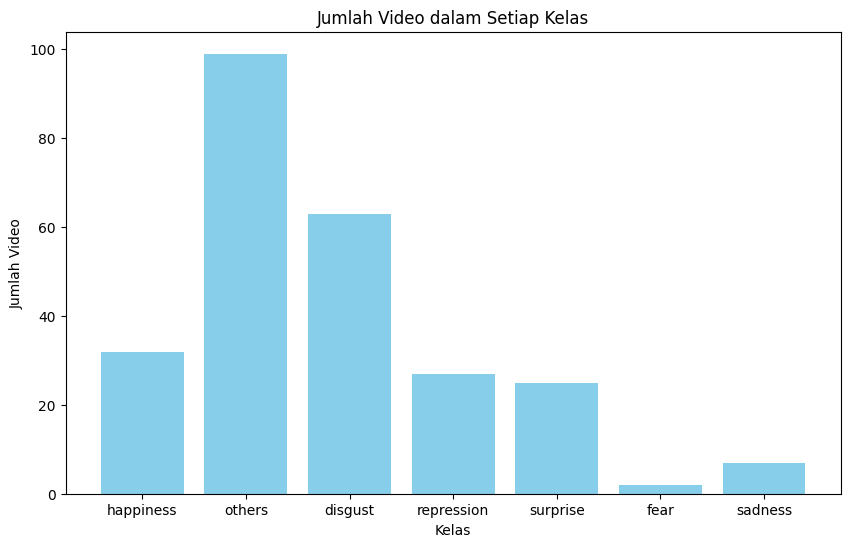

In [ ]:
# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(video_counts.keys(), video_counts.values(), color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Video')
plt.title('Jumlah Video dalam Setiap Kelas')
plt.xticks(range(len(video_counts)), video_counts.keys())
plt.show()

#Balanced Data

In [ ]:
import random
from shutil import copyfile

output_dir = '/content/skripsi/undersample_data'

In [ ]:
target_videos = 27

In [ ]:
# Function to perform undersampling and copy all videos to undersample_data directory
def undersample_class(class_folder, output_dir):
    # List videos in the class folder
    videos = [video for video in os.listdir(class_folder) if video.endswith('.avi')]
    num_videos = len(videos)

    # Create folder in output_dir
    class_name = os.path.basename(class_folder)
    output_class_folder = os.path.join(output_dir, class_name)
    os.makedirs(output_class_folder, exist_ok=True)

    if num_videos > target_videos:
        # Perform undersampling if number of videos is more than target_videos
        videos_to_keep = random.sample(videos, target_videos)

        # Move undersampled videos to undersample data folder
        for video in videos_to_keep:
            src_path = os.path.join(class_folder, video)
            dest_path = os.path.join(output_class_folder, video)
            shutil.copy(src_path, dest_path)

        print(f"Undersampled class {class_name} to {target_videos} videos and saved to output_dir.")
    else:
        # Copy all videos if number of videos is less than or equal to target_videos
        for video in videos:
            src_path = os.path.join(class_folder, video)
            dest_path = os.path.join(output_class_folder, video)
            shutil.copy(src_path, dest_path)

        print(f"Class {class_name} has {num_videos} videos, copied all to output_dir.")

In [ ]:
# Iterate over each class folder in the dataset
for class_folder in os.listdir(dataset_dir):
    class_folder_path = os.path.join(dataset_dir, class_folder)

    if os.path.isdir(class_folder_path):
        undersample_class(class_folder_path, output_dir)

print("Undersampling and saving to undersample_data completed.")

Undersampled class happiness to 27 videos and saved to output_dir.
Undersampled class others to 27 videos and saved to output_dir.
Undersampled class disgust to 27 videos and saved to output_dir.
Class repression has 27 videos, copied all to output_dir.
Class surprise has 25 videos, copied all to output_dir.
Class fear has 2 videos, copied all to output_dir.
Class sadness has 7 videos, copied all to output_dir.
Undersampling and saving to undersample_data completed.


In [ ]:
# List all subdirectories (kelas) in the dataset folder
kelas_folders = os.listdir(output_dir)

# Dictionary to store the count of videos in each class folder
video_counts = {}

# Iterate through each class folder and count the number of videos
for kelas_folder in kelas_folders:
    class_path = os.path.join(output_dir, kelas_folder)
    if os.path.isdir(class_path):
        # Count all files with .avi extension in the class folder
        videos_in_class = [file for file in os.listdir(class_path) if file.endswith('.avi')]
        video_counts[kelas_folder] = len(videos_in_class)

In [ ]:
# Print the counts of videos in each class folder
for kelas_folder, count in video_counts.items():
    print(f"Kelas {kelas_folder}: {count} video")

# If you want to sum all videos in all classes, you can do:
total_videos = sum(video_counts.values())
print(f"Total videos in all classes: {total_videos}")

Kelas happiness: 27 video
Kelas others: 27 video
Kelas disgust: 27 video
Kelas repression: 27 video
Kelas surprise: 25 video
Kelas fear: 2 video
Kelas sadness: 7 video
Total videos in all classes: 142


#Ekstraksi Frame

In [ ]:
import cv2

def extract_frames(video_path, output_dir):
    video_name = os.path.basename(video_path).split('.')[0]
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_times_sec = []

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    for i in range(frame_count):
        ret, frame = cap.read()
        if not ret:
            break
        frame_time_sec = round(i / fps, 3)  # Waktu dalam detik dengan tiga angka di belakang koma
        frame_times_sec.append(frame_time_sec)
        frame_filename = os.path.join(output_dir, f"frame_{i:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Extracted frame {i} from {video_name} at {frame_time_sec:.3f} seconds")

    cap.release()
    return frame_times_sec

In [ ]:
# Direktori utama yang berisi folder untuk setiap kelas video
main_dir = '/content/skripsi/undersample_data'
output_dir = '/content/skripsi/output_extract_data'
csv_dir = '/content/skripsi'

# DataFrame untuk mengumpulkan semua waktu frame
all_frame_times = []

# Loop melalui setiap kelas
for category in os.listdir(main_dir):
    category_dir = os.path.join(main_dir, category)
    if os.path.isdir(category_dir):
        output_category_dir = os.path.join(output_dir, category)
        os.makedirs(output_category_dir, exist_ok=True)

        # Loop melalui setiap video dalam kelas ini
        for video_file in os.listdir(category_dir):
            if video_file.endswith(('.mp4', '.avi', '.mov')):
                video_path = os.path.join(category_dir, video_file)
                video_output_folder = os.path.join(output_category_dir, os.path.splitext(video_file)[0])
                os.makedirs(video_output_folder, exist_ok=True)
                print(f"Processing video file: {video_path}")
                # Ekstraksi frame
                extract_frames(video_path, video_output_folder)

                # Simpan waktu frame ke dalam list all_frame_times
                frame_times_sec = extract_frames(video_path, video_output_folder)
                for time_sec in frame_times_sec:
                    all_frame_times.append({'category': category, 'video_file': video_file, 'time_sec': time_sec})

Output streaming akan dipotong hingga 5000 baris terakhir.
Extracted frame 82 from 01_EP19_05f at 2.733 seconds
Extracted frame 83 from 01_EP19_05f at 2.767 seconds
Extracted frame 84 from 01_EP19_05f at 2.800 seconds
Extracted frame 85 from 01_EP19_05f at 2.833 seconds
Extracted frame 86 from 01_EP19_05f at 2.867 seconds
Processing video file: /content/skripsi/undersample_data/disgust/01_EP19_06f.avi
Extracted frame 0 from 01_EP19_06f at 0.000 seconds
Extracted frame 1 from 01_EP19_06f at 0.033 seconds
Extracted frame 2 from 01_EP19_06f at 0.067 seconds
Extracted frame 3 from 01_EP19_06f at 0.100 seconds
Extracted frame 4 from 01_EP19_06f at 0.133 seconds
Extracted frame 5 from 01_EP19_06f at 0.167 seconds
Extracted frame 6 from 01_EP19_06f at 0.200 seconds
Extracted frame 7 from 01_EP19_06f at 0.233 seconds
Extracted frame 8 from 01_EP19_06f at 0.267 seconds
Extracted frame 9 from 01_EP19_06f at 0.300 seconds
Extracted frame 10 from 01_EP19_06f at 0.333 seconds
Extracted frame 11 fro

In [ ]:
# Buat DataFrame dari semua waktu frame
all_frame_times_df = pd.DataFrame(all_frame_times)

In [ ]:
# Simpan ke dalam file CSV tunggal dengan waktu detik dengan tiga angka di belakang koma
frame_times_csv = os.path.join(csv_dir, 'all_frame_times.csv')
all_frame_times_df.to_csv(frame_times_csv, index=False, float_format='%.3f')
print(f"All frame times saved to: {frame_times_csv}")

All frame times saved to: /content/skripsi/all_frame_times.csv


In [ ]:
# Baca file CSV ke dalam DataFrame
csv_file_path = '/content/skripsi/all_frame_times.csv'
df = pd.read_csv(csv_file_path)

# Tampilkan beberapa baris pertama dari DataFrame
print(df.head())

# Tampilkan informasi umum tentang DataFrame
print(df.info())

    category      video_file  time_sec
0  happiness  26_EP03_10.avi     0.000
1  happiness  26_EP03_10.avi     0.033
2  happiness  26_EP03_10.avi     0.067
3  happiness  26_EP03_10.avi     0.100
4  happiness  26_EP03_10.avi     0.133
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    5339 non-null   object 
 1   video_file  5339 non-null   object 
 2   time_sec    5339 non-null   float64
dtypes: float64(1), object(2)
memory usage: 125.3+ KB
None


In [ ]:
extract_dir = '/content/skripsi/output_extract_data'

def count_frames_in_classes(extract_dir):
    class_counts = {}
    for class_name in os.listdir(extract_dir):
        class_dir = os.path.join(extract_dir, class_name)
        if os.path.isdir(class_dir):
            total_frames = 0
            for video_folder in os.listdir(class_dir):
                video_folder_path = os.path.join(class_dir, video_folder)
                if os.path.isdir(video_folder_path):
                    frame_count = len([file for file in os.listdir(video_folder_path) if file.endswith('.jpg')])
                    total_frames += frame_count
            class_counts[class_name] = total_frames
    return class_counts

In [ ]:
# Menghitung jumlah frame dalam setiap kelas
class_counts = count_frames_in_classes(extract_dir)

In [ ]:
class_counts

{'happiness': 1081,
 'others': 777,
 'disgust': 1165,
 'repression': 1003,
 'surprise': 826,
 'fear': 59,
 'sadness': 428}

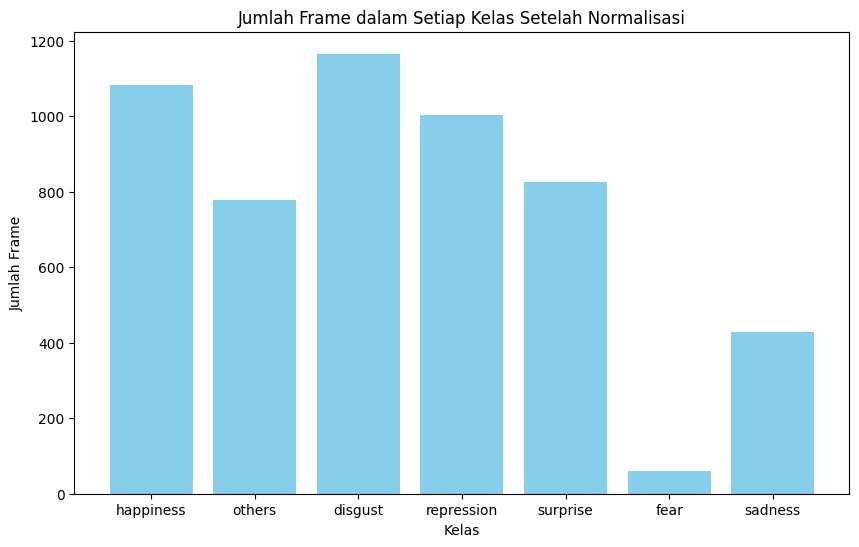

In [ ]:
# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Frame')
plt.title('Jumlah Frame dalam Setiap Kelas Setelah Normalisasi')
plt.show()

#Preprocessing Data

In [ ]:
pip install face-alignment

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import face_alignment
from skimage import io, transform, color, img_as_ubyte
from sklearn.preprocessing import StandardScaler
from scipy.ndimage import median_filter

# Direktori input dan output
input_base_dir = '/content/skripsi/output_extract_data'  # Direktori data yang sudah diekstraksi
cropped_output_base_dir = '/content/skripsi/cropped_data'
output_base_dir = '/content/skripsi/preprocess_data'  # Direktori output untuk hasil grayscale, resize, dan normalisasi

In [ ]:
# Initialize the face alignment model
fa = face_alignment.FaceAlignment('2D', device='cuda' if torch.cuda.is_available() else 'cpu')

def align_face(image):
    landmarks = fa.get_landmarks(image)
    if landmarks:
        cropped_image = crop_image_based_on_landmarks(image, landmarks[0])
        normalized_image = normalize_image(cropped_image)
        return cropped_image, normalized_image
    return image, image

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100%|██████████| 85.7M/85.7M [00:05<00:00, 15.9MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/3DFAN4-4a694010b9.zip" to /root/.cache/torch/hub/checkpoints/3DFAN4-4a694010b9.zip
100%|██████████| 91.9M/91.9M [00:05<00:00, 17.9MB/s]


In [ ]:
def crop_image_based_on_landmarks(image, landmarks):
    center = landmarks.mean(axis=0).astype(int)
    crop_size = 224
    half_crop = crop_size // 2
    start_row = max(0, center[1] - half_crop)
    end_row = min(image.shape[0], center[1] + half_crop)
    start_col = max(0, center[0] - half_crop)
    end_col = min(image.shape[1], center[0] + half_crop)
    cropped_image = image[start_row:end_row, start_col:end_col]

    cropped_image = transform.resize(cropped_image, (224, 224))

    return cropped_image

In [ ]:
def normalize_image(image):
    # Convert to grayscale if necessary
    if image.ndim == 3:
        image = color.rgb2gray(image)

    # Normalize image to be between 0 and 1
    scaler = StandardScaler()
    normalized_image = scaler.fit_transform(image.reshape(-1, 1)).reshape(image.shape)
    normalized_image = (normalized_image - np.min(normalized_image)) / np.ptp(normalized_image)

    # Stretch the intensity range to preserve brightness
    normalized_image = (normalized_image - np.min(normalized_image)) / (np.max(normalized_image) - np.min(normalized_image))

    # Apply noise reduction using Median Filtering
    filtered_image = median_filter(normalized_image, size=3)

    return filtered_image

In [ ]:
def process_images(input_base_dir, cropped_output_base_dir, normalized_output_base_dir):
    for root, dirs, files in os.walk(input_base_dir):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(root, file)
                relative_path = os.path.relpath(root, input_base_dir)

                cropped_output_dir = os.path.join(cropped_output_base_dir, relative_path)
                normalized_output_dir = os.path.join(normalized_output_base_dir, relative_path)

                # Create directories if they don't exist
                os.makedirs(cropped_output_dir, exist_ok=True)
                os.makedirs(normalized_output_dir, exist_ok=True)

                # Read image using skimage
                image = io.imread(image_path)

                # Align and normalize image
                cropped_image, normalized_image = align_face(image)

                # Save cropped and normalized images
                cropped_filename = os.path.join(cropped_output_dir, file)
                normalized_filename = os.path.join(normalized_output_dir, file)

                io.imsave(cropped_filename, img_as_ubyte(cropped_image))
                io.imsave(normalized_filename, img_as_ubyte(normalized_image))

In [ ]:
# Proses gambar-gambar yang sudah ada
process_images(input_base_dir, cropped_output_base_dir, output_base_dir)

print("Image alignment, normalization, and saving completed.")

Image alignment, normalization, and saving completed.


#File Frame

In [ ]:
# Path to the root directory containing the class folders
root_dir = '/content/skripsi/preprocess_data'
# Path to the CSV file to save the documentation
output_csv = '/content/skripsi/file_frame.csv'

# List to hold the data
data = []

# Traverse the directory structure
for class_folder in os.listdir(root_dir):
    class_folder_path = os.path.join(root_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for video_folder in os.listdir(class_folder_path):
            video_folder_path = os.path.join(class_folder_path, video_folder)
            if os.path.isdir(video_folder_path):
                for frame_file in os.listdir(video_folder_path):
                    frame_file_path = os.path.join(video_folder_path, frame_file)
                    if os.path.isfile(frame_file_path):
                        frame_name = os.path.basename(frame_file_path)  # Get only the frame name
                        data.append([video_folder, frame_name, class_folder])

# Write the data to a CSV file
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write the header
    writer.writerow(['video_name', 'frame_name', 'label'])
    # Write the data
    writer.writerows(data)

print(f"Documentation saved to {output_csv}")

Documentation saved to /content/skripsi/file_frame.csv


In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/file_frame.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

      video_name      frame_name      label
0     26_EP03_10  frame_0000.jpg  happiness
1     26_EP03_10  frame_0001.jpg  happiness
2     26_EP03_10  frame_0002.jpg  happiness
3     26_EP03_10  frame_0003.jpg  happiness
4     26_EP03_10  frame_0004.jpg  happiness
...          ...             ...        ...
5334  26_EP15_01  frame_0025.jpg    sadness
5335  26_EP15_01  frame_0026.jpg    sadness
5336  26_EP15_01  frame_0027.jpg    sadness
5337  26_EP15_01  frame_0028.jpg    sadness
5338  26_EP15_01  frame_0029.jpg    sadness

[5339 rows x 3 columns]


In [ ]:
# Path to your CSV file
csv_file = '/content/skripsi/all_frame_times.csv'

# Kolom yang ingin diambil (misal kolom ketiga)
target_column_index = 2  # Index dimulai dari 0, untuk kolom ketiga gunakan index 2

# Path untuk menyimpan file CSV baru
output_csv = '/content/skripsi/time_frames.csv'

# List untuk menyimpan nilai dari kolom yang diambil
column_values = []

# Baca file CSV dan ambil kolom yang diinginkan
with open(csv_file, mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        if row:  # Memastikan baris tidak kosong
            column_values.append([row[target_column_index]])

# Simpan ke file CSV baru
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(column_values)

print(f"Data from column {target_column_index + 1} saved to {output_csv}")

Data from column 3 saved to /content/skripsi/time_frames.csv


In [ ]:
# Path to annotation file and time_frames file
annotation_file = '/content/skripsi/file_frame.csv'
time_frames_file = '/content/skripsi/time_frames.csv'

# Path to output merged file
output_merged_file = '/content/skripsi/file_time_frame.csv'

# Baca file CSV menggunakan pandas
df_annotation = pd.read_csv(annotation_file)
df_time_frames = pd.read_csv(time_frames_file)

# Gabungkan kedua dataframe berdasarkan indeks mereka secara default
df_merged = pd.concat([df_annotation, df_time_frames], axis=1)

# Simpan dataframe yang telah digabungkan ke file CSV baru
df_merged.to_csv(output_merged_file, index=False)

print(f"Merged data saved to {output_merged_file}")

Merged data saved to /content/skripsi/file_time_frame.csv


In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/file_time_frame.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

      video_name      frame_name      label  time_sec
0     26_EP03_10  frame_0000.jpg  happiness     0.000
1     26_EP03_10  frame_0001.jpg  happiness     0.033
2     26_EP03_10  frame_0002.jpg  happiness     0.067
3     26_EP03_10  frame_0003.jpg  happiness     0.100
4     26_EP03_10  frame_0004.jpg  happiness     0.133
...          ...             ...        ...       ...
5334  26_EP15_01  frame_0025.jpg    sadness     0.833
5335  26_EP15_01  frame_0026.jpg    sadness     0.867
5336  26_EP15_01  frame_0027.jpg    sadness     0.900
5337  26_EP15_01  frame_0028.jpg    sadness     0.933
5338  26_EP15_01  frame_0029.jpg    sadness     0.967

[5339 rows x 4 columns]


#Augmentasi Data

In [ ]:
from PIL import Image, ImageEnhance, ImageOps

# Direktori input dan output
extracted_frames_dir = '/content/skripsi/preprocess_data'  # Direktori output_extract_data yang berisi 7 kelas
augmented_data_dir = '/content/skripsi/augmented_data'  # Direktori augmented_data untuk menyimpan hasil augmentasi
csv_file = '/content/skripsi/file_time_frame.csv'  # Sesuaikan dengan path yang benar
output_csv_path = '/content/skripsi/all_frames_times_augmented.csv'
os.makedirs(augmented_data_dir, exist_ok=True)

In [ ]:
# Target number of videos per class
target_videos = 27

In [ ]:
# Function to load frame times from CSV
def load_frame_times(csv_file):
    df = pd.read_csv(csv_file)
    return df

# Function to save frame times to CSV
def save_frame_times(df, output_csv_path):
    df.to_csv(output_csv_path, index=False)

In [ ]:
# Augmentation functions
def augment_image(image):
    # Random flip
    if random.random() > 0.5:
        image = ImageOps.mirror(image)
    # Random rotation
    if random.random() > 0.5:
        angle = random.randint(-30, 30)
        image = image.rotate(angle)
    # Random color enhancement
    enhancer = ImageEnhance.Color(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))
    # Random brightness enhancement
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(random.uniform(0.8, 1.2))
    return image

In [ ]:
# Function to perform augmentation
def augment_class(class_folder, num_augmented_videos, frame_times_df, augmented_df):
    video_folders = [folder for folder in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, folder))]
    original_videos = len(video_folders)

    # Create output class folder in augmented_data_dir
    class_name = os.path.basename(class_folder)
    output_class_folder = os.path.join(augmented_data_dir, class_name)
    os.makedirs(output_class_folder, exist_ok=True)

    # Copy original videos to augmented_data_dir
    for video_folder in video_folders:
        src_path = os.path.join(class_folder, video_folder)
        dest_path = os.path.join(output_class_folder, video_folder)
        shutil.copytree(src_path, dest_path)

    # Perform augmentation
    for i in range(num_augmented_videos):
        video_to_augment = random.choice(video_folders)
        video_path = os.path.join(class_folder, video_to_augment)
        new_video_folder = f"{video_to_augment}_aug_{i+1}"
        new_video_path = os.path.join(output_class_folder, new_video_folder)
        os.makedirs(new_video_path, exist_ok=True)

        for frame in os.listdir(video_path):
            frame_path = os.path.join(video_path, frame)
            if frame.endswith('.jpg'):
                image = Image.open(frame_path)
                augmented_image = augment_image(image)
                augmented_frame_name = f"aug_{frame}"
                augmented_image.save(os.path.join(new_video_path, augmented_frame_name))

                # Update augmented_df with new frame information
                frame_info = frame_times_df[(frame_times_df['video_name'] == video_to_augment) & (frame_times_df['frame_name'] == frame)]
                for _, row in frame_info.iterrows():
                    new_row = pd.DataFrame({
                        'video_name': [new_video_folder],
                        'frame_name': [augmented_frame_name],
                        'label': [row['label']],
                        'time_sec': [row['time_sec']]
                    })
                    augmented_df = pd.concat([augmented_df, new_row], ignore_index=True)

    return augmented_df

In [ ]:
# Load frame times from CSV
frame_times_df = load_frame_times(csv_file)

# Initialize augmented_df with original frame times
augmented_df = frame_times_df.copy()

In [ ]:
# Iterate over each class folder in the extracted frames directory
for class_folder in os.listdir(extracted_frames_dir):
    class_folder_path = os.path.join(extracted_frames_dir, class_folder)

    if os.path.isdir(class_folder_path):
        video_folders = [folder for folder in os.listdir(class_folder_path) if os.path.isdir(os.path.join(class_folder_path, folder))]
        num_videos = len(video_folders)

        if num_videos < target_videos:
            num_augmented_videos = target_videos - num_videos
            augmented_df = augment_class(class_folder_path, num_augmented_videos, frame_times_df, augmented_df)
        else:
            # Copy all videos to augmented_data_dir if no augmentation is needed
            output_class_folder = os.path.join(augmented_data_dir, class_folder)
            os.makedirs(output_class_folder, exist_ok=True)
            for video_folder in video_folders:
                src_path = os.path.join(class_folder_path, video_folder)
                dest_path = os.path.join(output_class_folder, video_folder)
                shutil.copytree(src_path, dest_path)
            print(f"Copied class {class_folder} with {num_videos} videos to augmented_data_dir without augmentation.")

Copied class happiness with 27 videos to augmented_data_dir without augmentation.
Copied class others with 27 videos to augmented_data_dir without augmentation.
Copied class disgust with 27 videos to augmented_data_dir without augmentation.
Copied class repression with 27 videos to augmented_data_dir without augmentation.


In [ ]:
# Save updated frame times DataFrame to CSV
save_frame_times(augmented_df, output_csv_path)

print("Augmentation and saving to augmented_data completed.")

Augmentation and saving to augmented_data completed.


In [ ]:
# List all subdirectories (kelas) in the dataset folder
augmented_data = '/content/skripsi/augmented_data'

kelas_folders = os.listdir(augmented_data)

# Function to count number of video folders per class
def count_videos_per_class(augmented_data):
    class_counts = {}
    for class_name in os.listdir(augmented_data):
        class_path = os.path.join(augmented_data, class_name)
        if os.path.isdir(class_path):
            video_folders = [folder for folder in os.listdir(class_path) if os.path.isdir(os.path.join(class_path, folder))]
            class_counts[class_name] = len(video_folders)
    return class_counts

In [ ]:
class_counts = count_videos_per_class(augmented_data)

In [ ]:
# Print the counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}' has {count} videos.")

Class 'happiness' has 27 videos.
Class 'others' has 27 videos.
Class 'disgust' has 27 videos.
Class 'repression' has 27 videos.
Class 'surprise' has 27 videos.
Class 'fear' has 27 videos.
Class 'sadness' has 27 videos.


In [ ]:
augmented_dir = '/content/skripsi/augmented_data'

def count_frames_in_classes(augmented_dir):
    class_counts = {}
    for class_name in os.listdir(augmented_dir):
        class_dir = os.path.join(augmented_dir, class_name)
        if os.path.isdir(class_dir):
            total_frames = 0
            for video_folder in os.listdir(class_dir):
                video_folder_path = os.path.join(class_dir, video_folder)
                if os.path.isdir(video_folder_path):
                    frame_count = len([file for file in os.listdir(video_folder_path) if file.endswith('.jpg')])
                    total_frames += frame_count
            class_counts[class_name] = total_frames
    return class_counts

In [ ]:
# Menghitung jumlah frame dalam setiap kelas
class_counts = count_frames_in_classes(augmented_dir)

In [ ]:
class_counts

{'happiness': 1081,
 'others': 777,
 'disgust': 1165,
 'repression': 1003,
 'surprise': 875,
 'fear': 783,
 'sadness': 1723}

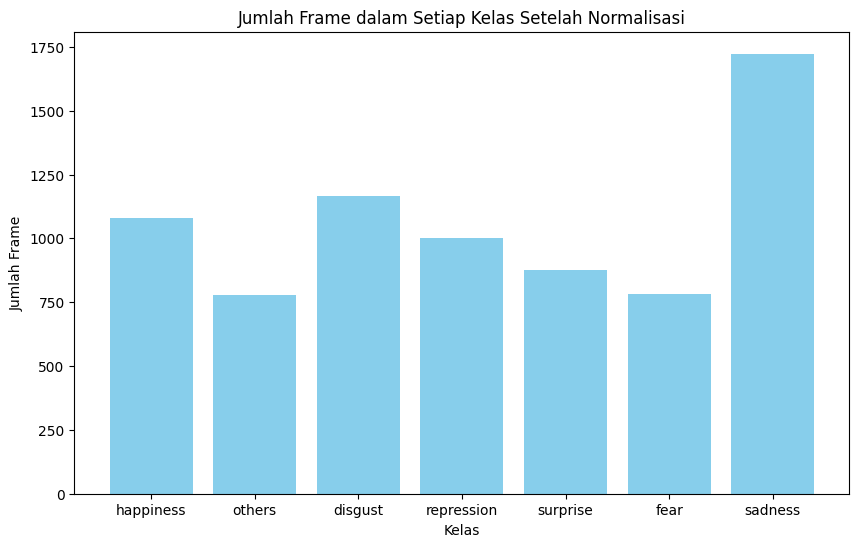

In [ ]:
# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Frame')
plt.title('Jumlah Frame dalam Setiap Kelas Setelah Normalisasi')
plt.show()

In [ ]:
# Path to the directory containing class folders
frames_dir = '/content/skripsi/augmented_data'  # Sesuaikan dengan path yang benar

# Iterate over each class folder in frames_dir
for class_folder in os.listdir(frames_dir):
    class_folder_path = os.path.join(frames_dir, class_folder)

    if os.path.isdir(class_folder_path):
        video_folders = [folder for folder in os.listdir(class_folder_path) if os.path.isdir(os.path.join(class_folder_path, folder))]
        num_videos = len(video_folders)
        print(f"Class {class_folder} has {num_videos} video directories.")

        # Iterate over each video folder in the class folder
        for video_folder in video_folders:
            video_folder_path = os.path.join(class_folder_path, video_folder)

            if os.path.isdir(video_folder_path):
                # List all frame files (assuming they are images) in the video folder
                frame_files = [file for file in os.listdir(video_folder_path) if file.endswith(('.jpg', '.jpeg', '.png'))]

                # Count the number of frame files
                num_frames = len(frame_files)

                print(f"Class {class_folder}, Video {video_folder}: {num_frames} frames")

Class happiness has 27 video directories.
Class happiness, Video 26_EP03_10: 52 frames
Class happiness, Video 17_EP03_09: 104 frames
Class happiness, Video 09_EP15_05: 30 frames
Class happiness, Video 02_EP09_01: 37 frames
Class happiness, Video 17_EP01_06: 30 frames
Class happiness, Video 19_EP01_02f: 43 frames
Class happiness, Video 17_EP13_09: 39 frames
Class happiness, Video 16_EP01_05: 24 frames
Class happiness, Video 06_EP01_01: 36 frames
Class happiness, Video 09_EP09f: 14 frames
Class happiness, Video 23_EP02_01: 45 frames
Class happiness, Video 01_EP02_01f: 44 frames
Class happiness, Video 13_EP09_10: 11 frames
Class happiness, Video 09_EP02_01f: 44 frames
Class happiness, Video 15_EP03_02: 35 frames
Class happiness, Video 14_EP09_04: 33 frames
Class happiness, Video 13_EP03_01: 33 frames
Class happiness, Video 17_EP05_02: 41 frames
Class happiness, Video 09_EP06_02f: 18 frames
Class happiness, Video 17_EP06_07: 54 frames
Class happiness, Video 12_EP08_07: 51 frames
Class happ

In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/all_frames_times_augmented.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

             video_name          frame_name      label  time_sec
0            26_EP03_10      frame_0000.jpg  happiness     0.000
1            26_EP03_10      frame_0001.jpg  happiness     0.033
2            26_EP03_10      frame_0002.jpg  happiness     0.067
3            26_EP03_10      frame_0003.jpg  happiness     0.100
4            26_EP03_10      frame_0004.jpg  happiness     0.133
...                 ...                 ...        ...       ...
7402  17_EP15_01_aug_20  aug_frame_0025.jpg    sadness     0.833
7403  17_EP15_01_aug_20  aug_frame_0026.jpg    sadness     0.867
7404  17_EP15_01_aug_20  aug_frame_0027.jpg    sadness     0.900
7405  17_EP15_01_aug_20  aug_frame_0028.jpg    sadness     0.933
7406  17_EP15_01_aug_20  aug_frame_0029.jpg    sadness     0.967

[7407 rows x 4 columns]


#Annotation

In [ ]:
# Path ke folder yang berisi frame-frame (misalnya, augmented_data)
frames_root = '/content/skripsi/augmented_data'

# Path ke file all_frame_times.csv
all_frame_times_path = '/content/skripsi/all_frames_times_augmented.csv'

# Baca file all_frame_times.csv
df_all_frames = pd.read_csv(all_frame_times_path)

# Inisialisasi list untuk menyimpan data annotasi
annotations = []

# Temukan jumlah frame paling sedikit di dalam semua direktori video
min_frames = float('inf')

# Loop melalui setiap kelas (folder kelas) dalam frames_root
for class_folder in os.listdir(frames_root):
    class_path = os.path.join(frames_root, class_folder)

    # Loop melalui setiap video (folder video) dalam setiap kelas
    for video_folder in os.listdir(class_path):
        video_path = os.path.join(class_path, video_folder)
        frame_files = os.listdir(video_path)

        if len(frame_files) < min_frames:
            min_frames = len(frame_files)

# Sekarang min_frames memiliki nilai jumlah frame paling sedikit
print(f'Jumlah frame paling sedikit adalah: {min_frames}')

Jumlah frame paling sedikit adalah: 11


In [ ]:
# Loop lagi untuk membuat anotasi
for class_folder in os.listdir(frames_root):
    class_path = os.path.join(frames_root, class_folder)

    for video_folder in os.listdir(class_path):
        video_path = os.path.join(class_path, video_folder)
        frame_files = os.listdir(video_path)

        # Pilih beberapa frame secara acak berdasarkan min_frames
        selected_frames = random.sample(frame_files, min_frames)

        for frame_file in selected_frames:
            frame_name = frame_file  # Contoh: frame_0001.jpg

            # Cari informasi timestamp dan label ekspresi dari df_all_frames
            video_name = f'{video_folder}'
            frame_info = df_all_frames[(df_all_frames['video_name'] == video_name) & (df_all_frames['frame_name'] == frame_name)]

            if not frame_info.empty:
                timestamp = frame_info['time_sec'].values[0]
                expression_label = frame_info['label'].values[0]

                # Format data untuk satu frame
                annotation_data = {
                    'video_name': video_name,
                    'frame_name': frame_name,
                    'expression_label': expression_label,
                    'timestamp': timestamp
                }
                annotations.append(annotation_data)

# Simpan data annotasi ke dalam file CSV
output_csv_path = '/content/skripsi/annotation_file.csv'
df_annotations = pd.DataFrame(annotations)

# Cetak beberapa baris pertama dari DataFrame untuk memastikan isinya
print(df_annotations.head())

   video_name      frame_name expression_label  timestamp
0  26_EP03_10  frame_0031.jpg        happiness      1.033
1  26_EP03_10  frame_0028.jpg        happiness      0.933
2  26_EP03_10  frame_0045.jpg        happiness      1.500
3  26_EP03_10  frame_0039.jpg        happiness      1.300
4  26_EP03_10  frame_0002.jpg        happiness      0.067


In [ ]:
# Simpan DataFrame ke file CSV
df_annotations.to_csv(output_csv_path, index=False)

print(f"File CSV berhasil disimpan di: {output_csv_path}")

File CSV berhasil disimpan di: /content/skripsi/annotation_file.csv


In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/annotation_file.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

             video_name          frame_name expression_label  timestamp
0            26_EP03_10      frame_0031.jpg        happiness      1.033
1            26_EP03_10      frame_0028.jpg        happiness      0.933
2            26_EP03_10      frame_0045.jpg        happiness      1.500
3            26_EP03_10      frame_0039.jpg        happiness      1.300
4            26_EP03_10      frame_0002.jpg        happiness      0.067
...                 ...                 ...              ...        ...
2074  17_EP15_01_aug_20  aug_frame_0012.jpg          sadness      0.400
2075  17_EP15_01_aug_20  aug_frame_0006.jpg          sadness      0.200
2076  17_EP15_01_aug_20  aug_frame_0029.jpg          sadness      0.967
2077  17_EP15_01_aug_20  aug_frame_0016.jpg          sadness      0.533
2078  17_EP15_01_aug_20  aug_frame_0000.jpg          sadness      0.000

[2079 rows x 4 columns]


In [ ]:
# Direktori augmented_data
augmented_data_dir = '/content/skripsi/augmented_data'

# Nama file CSV yang akan dibuat
csv_file = '/content/skripsi/augmented_data.csv'

# Header kolom pada file CSV
header = ['Video Name', 'Frame Name', 'Label']

In [ ]:
# Buka file CSV untuk menulis
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Tulis header kolom ke file CSV

    # Iterasi melalui setiap kelas (direktori kelas)
    for class_dir in os.listdir(augmented_data_dir):
        class_path = os.path.join(augmented_data_dir, class_dir)
        if os.path.isdir(class_path):
            # Iterasi melalui setiap direktori video di dalam kelas
            for video_dir in os.listdir(class_path):
                video_path = os.path.join(class_path, video_dir)
                if os.path.isdir(video_path):
                    # Iterasi melalui setiap frame di dalam direktori video
                    for frame_file in os.listdir(video_path):
                        frame_path = os.path.join(video_path, frame_file)
                        if os.path.isfile(frame_path):
                            # Ambil nama frame (atau sesuaikan sesuai struktur direktori Anda)
                            frame_name = frame_file
                            # Tulis baris baru ke file CSV
                            writer.writerow([video_dir, frame_name, class_dir])

print(f"File CSV '{csv_file}' telah berhasil dibuat.")

File CSV '/content/skripsi/augmented_data.csv' telah berhasil dibuat.


In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/augmented_data.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

             Video Name          Frame Name      Label
0            26_EP03_10      frame_0000.jpg  happiness
1            26_EP03_10      frame_0001.jpg  happiness
2            26_EP03_10      frame_0002.jpg  happiness
3            26_EP03_10      frame_0003.jpg  happiness
4            26_EP03_10      frame_0004.jpg  happiness
...                 ...                 ...        ...
7402  17_EP15_01_aug_20  aug_frame_0025.jpg    sadness
7403  17_EP15_01_aug_20  aug_frame_0026.jpg    sadness
7404  17_EP15_01_aug_20  aug_frame_0027.jpg    sadness
7405  17_EP15_01_aug_20  aug_frame_0028.jpg    sadness
7406  17_EP15_01_aug_20  aug_frame_0029.jpg    sadness

[7407 rows x 3 columns]


In [ ]:
# Path to your CSV file
csv_file = '/content/skripsi/all_frames_times_augmented.csv'

# Kolom yang ingin diambil (misal kolom ketiga)
target_column_index = 3  # Index dimulai dari 0, untuk kolom ketiga gunakan index 2

# Path untuk menyimpan file CSV baru
output_csv = '/content/skripsi/time_frames_augmented.csv'

# List untuk menyimpan nilai dari kolom yang diambil
column_values = []

# Baca file CSV dan ambil kolom yang diinginkan
with open(csv_file, mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        if row:  # Memastikan baris tidak kosong
            column_values.append([row[target_column_index]])

# Simpan ke file CSV baru
with open(output_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(column_values)

print(f"Data from column {target_column_index + 1} saved to {output_csv}")

Data from column 4 saved to /content/skripsi/time_frames_augmented.csv


In [ ]:
# Path to annotation file and time_frames file
annotation_file = '/content/skripsi/augmented_data.csv'
time_frames_file = '/content/skripsi/time_frames_augmented.csv'

# Path to output merged file
output_merged_file = '/content/skripsi/label.csv'

# Baca file CSV menggunakan pandas
df_annotation = pd.read_csv(annotation_file)
df_time_frames = pd.read_csv(time_frames_file)

# Gabungkan kedua dataframe berdasarkan indeks mereka secara default
df_merged = pd.concat([df_annotation, df_time_frames], axis=1)

# Simpan dataframe yang telah digabungkan ke file CSV baru
df_merged.to_csv(output_merged_file, index=False)

print(f"Merged data saved to {output_merged_file}")

Merged data saved to /content/skripsi/label.csv


In [ ]:
# Path to the CSV file
csv_file = '/content/skripsi/label.csv'

# Read the CSV file
df = pd.read_csv(csv_file)

# Display the contents of the CSV file
print(df)

             Video Name          Frame Name      Label  time_sec
0            26_EP03_10      frame_0000.jpg  happiness     0.000
1            26_EP03_10      frame_0001.jpg  happiness     0.033
2            26_EP03_10      frame_0002.jpg  happiness     0.067
3            26_EP03_10      frame_0003.jpg  happiness     0.100
4            26_EP03_10      frame_0004.jpg  happiness     0.133
...                 ...                 ...        ...       ...
7402  17_EP15_01_aug_20  aug_frame_0025.jpg    sadness     0.833
7403  17_EP15_01_aug_20  aug_frame_0026.jpg    sadness     0.867
7404  17_EP15_01_aug_20  aug_frame_0027.jpg    sadness     0.900
7405  17_EP15_01_aug_20  aug_frame_0028.jpg    sadness     0.933
7406  17_EP15_01_aug_20  aug_frame_0029.jpg    sadness     0.967

[7407 rows x 4 columns]


#Pembagian Dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Path ke direktori root augmented_data dan file annotation
root_dir = '/content/skripsi/augmented_data'
annotation_file = '/content/skripsi/label.csv'

# Membaca file annotation
annotations = pd.read_csv(annotation_file)

# Membagi data menjadi train dan test (80% train, 20% test)
train_data, test_data = train_test_split(annotations, test_size=0.2, random_state=42)

# Membuat folder untuk data train dan test
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Memindahkan file-frame train ke folder train
for index, row in train_data.iterrows():
    video_name = row['Video Name']
    frame_name = row['Frame Name']
    label = row['Label']

    source_path = os.path.join(root_dir, label, video_name, frame_name)
    target_path = os.path.join(train_dir, label, video_name, frame_name)

    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    shutil.copy(source_path, target_path)

# Memindahkan file-frame test ke folder test
for index, row in test_data.iterrows():
    video_name = row['Video Name']
    frame_name = row['Frame Name']
    label = row['Label']

    source_path = os.path.join(root_dir, label, video_name, frame_name)
    target_path = os.path.join(test_dir, label, video_name, frame_name)

    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    shutil.copy(source_path, target_path)

#Modelling

In [ ]:
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.models import efficientnet_b0
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from torch.cuda.amp import autocast, GradScaler

In [ ]:
# Definisikan root_dir dan annotation_file
root_dir = '/content/skripsi/augmented_data'
annotation_file = '/content/skripsi/label.csv'

# Membaca annotation file (label.csv)
annotations = pd.read_csv(annotation_file)

# Membuat label_map
label_map = {'happiness': 0, 'disgust': 1, 'surprise': 2, 'repression': 3, 'sadness': 4, 'fear': 5, 'others': 6}

# Struktur dataset berdasarkan root_dir dan annotations
data = []
for class_dir in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_dir)
    if os.path.isdir(class_path):
        for video_dir in os.listdir(class_path):
            video_path = os.path.join(class_path, video_dir)
            if os.path.isdir(video_path):
                frames = []
                for frame_file in sorted(os.listdir(video_path)):
                    frame_path = os.path.join(video_path, frame_file)
                    try:
                        frame = Image.open(frame_path).resize((224, 224))
                        frames.append(frame)
                    except Exception as e:
                        print(f"Error loading image {frame_path}: {e}")

                label = class_dir
                time_sec = None  # Inisialisasi time_sec

                # Cari time_sec berdasarkan video_dir pada annotations (label.csv)
                if not annotations.empty and 'Frame Name' in annotations.columns and 'time_sec' in annotations.columns:
                    matching_rows = annotations[annotations['Frame Name'].str.contains(video_dir)]
                    if not matching_rows.empty:
                        time_sec = matching_rows.iloc[0]['time_sec']

                data.append({'frames': frames, 'label': label, 'time_sec': time_sec})

# Transformasi
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
class VideoDataset(Dataset):
    def __init__(self, root_dir, annotation_file, transform=None):
        self.root_dir = root_dir
        self.annotations = pd.read_csv(annotation_file)
        self.transform = transform
        self.data = []
        self.label_map = {'happiness': 0, 'disgust': 1, 'surprise': 2, 'repression': 3, 'sadness': 4, 'fear': 5, 'others': 6}

        for class_dir in os.listdir(root_dir):
            class_path = os.path.join(root_dir, class_dir)
            if not os.path.isdir(class_path):
                continue
            for video_dir in os.listdir(class_path):
                video_path = os.path.join(class_path, video_dir)
                if not os.path.isdir(video_path):
                    continue
                frames = []
                for frame_file in sorted(os.listdir(video_path)):
                    frame_path = os.path.join(video_path, frame_file)
                    frames.append(frame_path)
                label = class_dir
                time_sec = self.annotations[self.annotations['Frame Name'].str.contains(video_dir)]['time_sec'].values[0]
                self.data.append({'frames': frames, 'label': label, 'time_sec': time_sec})

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        video_data = self.data[idx]
        frames = video_data['frames']
        label = self.label_map[video_data['label']]
        time_sec = video_data['time_sec']
        images = []
        for frame in frames:
            image = Image.open(frame).convert('RGB')
            if self.transform:
                image = self.transform(image)
            images.append(image)
        return torch.stack(images), label, time_sec

In [ ]:
def pad_collate(batch):
    max_len = max([item[0].size(0) for item in batch])
    padded_batch = []
    for item in batch:
        padded_frames = torch.nn.functional.pad(item[0], (0, 0, 0, 0, 0, max_len - item[0].size(0)))
        padded_batch.append((padded_frames, item[1]))
    frames_batch, labels_batch = zip(*padded_batch)
    return torch.stack(frames_batch), torch.tensor(labels_batch)

In [ ]:
# class VideoFrameDataset(Dataset):
#     def __init__(self, root_dir, annotation_file, transform=None):
#         self.root_dir = root_dir
#         self.annotation_file = annotation_file
#         self.transform = transform
#         self.label_map = {'happiness': 0, 'disgust': 1, 'surprise': 2, 'repression': 3, 'sadness': 4, 'fear': 5, 'others': 6}
#         self.video_frames = self._parse_annotation_file()

#     def _parse_annotation_file(self):
#         df = pd.read_csv(self.annotation_file)
#         video_frames = []
#         for _, row in df.iterrows():
#             video_name, frame_name, label, time_sec = row['Video Name'], row['Frame Name'], row['Label'], row['time_sec']
#             frame_path = os.path.join(self.root_dir, label, video_name, frame_name)
#             video_frames.append((frame_path, self.label_map[label], float(time_sec)))
#         return video_frames

#     def __len__(self):
#         return len(self.video_frames)

#     def __getitem__(self, idx):
#         frame_path, label, time_sec = self.video_frames[idx]
#         image = Image.open(frame_path).convert('RGB')
#         if self.transform:
#             image = self.transform(image)
#         return image, label, time_sec

# # Load dataset
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
# ])

# dataset = VideoFrameDataset(root_dir='/content/skripsi/augmented_data', annotation_file='/content/skripsi/label.csv', transform=transform)

In [ ]:
# class VideoFrameSequenceDataset(Dataset):
#     def __init__(self, video_dataset, sequence_length):
#         self.video_dataset = video_dataset
#         self.sequence_length = sequence_length

#     def __len__(self):
#         return len(self.video_dataset) // self.sequence_length

#     def __getitem__(self, idx):
#         start_idx = idx * self.sequence_length
#         images, labels, time_steps = [], [], []
#         for i in range(self.sequence_length):
#             image, label, time_step = self.video_dataset[start_idx + i]
#             images.append(image)
#             labels.append(label)
#             time_steps.append(time_step)
#         images = torch.stack(images)
#         # Menambahkan dimensi time_steps
#         images = images.unsqueeze(0).permute(1, 0, 2, 3, 4)  # (batch_size, time_steps, C, H, W)
#         return images, labels[0]

# sequence_length = 10  # Sesuaikan sesuai kebutuhan

# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# train_video_sequence_dataset = VideoFrameSequenceDataset(train_dataset, sequence_length)
# test_video_sequence_dataset = VideoFrameSequenceDataset(test_dataset, sequence_length)

# train_loader = DataLoader(train_video_sequence_dataset, batch_size=8, shuffle=True)
# test_loader = DataLoader(test_video_sequence_dataset, batch_size=8, shuffle=False)

In [ ]:
# Definisi model Spatial Stream dengan EfficientNet sebagai extractor fitur
class SpatialStream(nn.Module):
    def __init__(self, num_classes):
        super(SpatialStream, self).__init__()
        self.backbone = efficientnet_b0(weights='EfficientNet_B0_Weights.IMAGENET1K_V1')
        self.backbone.classifier[1] = nn.Linear(self.backbone.classifier[1].in_features, num_classes)

    def forward(self, x):
        x = self.backbone(x)
        return x

In [ ]:
# Definisi model Temporal Stream dengan TCN
class TemporalStream(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(TemporalStream, self).__init__()
        self.tcn = nn.Conv1d(input_size, hidden_size, kernel_size=2, stride=1, padding=1)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.tcn(x)
        x = nn.functional.relu(x)
        x = nn.functional.adaptive_avg_pool1d(x, 1).squeeze(2)
        x = self.fc(x)
        return x

In [ ]:
# Definisi model STCNN
class STCNN(nn.Module):
    def __init__(self, num_classes):
        super(STCNN, self).__init__()
        self.spatial_stream = SpatialStream(num_classes)
        self.temporal_stream = TemporalStream(input_size=num_classes, hidden_size=128, num_layers=2, num_classes=num_classes)

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.size()
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.spatial_stream(x)
        x = x.view(batch_size, time_steps, -1)
        x = self.temporal_stream(x)
        return x

In [ ]:
full_dataset = VideoDataset(root_dir=root_dir, annotation_file=annotation_file, transform=transform)

# Split dataset into training and testing sets
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

batch_size = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=pad_collate)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, collate_fn=pad_collate)

In [ ]:
# # Transformasi data
# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
# ])

# # Load dataset
# dataset = ImageFolder(root='/content/skripsi/augmented_data', transform=transform)

# # Split dataset menjadi train dan test
# train_size = int(0.8 * len(dataset))
# test_size = len(dataset) - train_size
# train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# # DataLoader
# train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [ ]:
# Hyperparameters
num_classes = 7
input_size = 1280  # Output size dari EfficientNet-B0
hidden_size = 256
num_layers = 2
num_epochs = 25
learning_rate = 0.001
accumulation_steps = 4

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = STCNN(num_classes=7).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scaler = GradScaler()

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for i, (video_frames, labels) in enumerate(train_loader):
        video_frames, labels = video_frames.to(device), labels.to(device)

        optimizer.zero_grad()
        with autocast():
            outputs = model(video_frames)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        if i % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

In [ ]:
# Evaluation
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#batas

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Definisi model Spatial Stream dengan EfficientNet dari torchvision
class SpatialStream(nn.Module):
    def __init__(self, num_classes):
        super(SpatialStream, self).__init__()
        self.backbone = models.efficientnet_b0(pretrained=True)
        self.backbone._fc = nn.Linear(self.backbone._fc.in_features, num_classes)

    def forward(self, x):
        x = self.backbone(x)
        return x

In [ ]:
class TemporalStream(nn.Module):
    def __init__(self, num_classes, input_size=224, seq_length=10):
        super(TemporalStream, self).__init__()
        self.tcn = nn.Sequential(
            nn.Conv1d(in_channels=seq_length, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
        )
        self.fc = nn.Linear(128 * (input_size // 4), num_classes)

    def forward(self, x):
        x = self.tcn(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [ ]:
import torch
import torch.nn as nn

# Definisi model STCNN yang menggabungkan Spatial dan Temporal Streams
class STCNN(nn.Module):
    def __init__(self, num_classes):
        super(STCNN, self).__init__()
        self.spatial_stream = SpatialStream(num_classes)
        self.temporal_stream = TemporalStream(num_classes)

    def forward(self, spatial_input, temporal_input):
        spatial_output = self.spatial_stream(spatial_input)
        temporal_output = self.temporal_stream(temporal_input)
        return spatial_output, temporal_output

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToTensor
import numpy as np

# Definisikan dataset dan loader untuk training dan testing
class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        video_name = self.dataframe.iloc[idx]['Video Name']
        frame_name = self.dataframe.iloc[idx]['Frame Name']
        label = self.dataframe.iloc[idx]['Label']

        frame_path = os.path.join(self.root_dir, label, video_name, frame_name)
        frame = Image.open(frame_path)

        if self.transform:
            frame = self.transform(frame)

        return frame, label

In [ ]:
# Transformasi yang digunakan untuk frame
transform = ToTensor()

# Buat objek dataset untuk training dan testing
train_dataset = CustomDataset(train_data, train_dir, transform=transform)
test_dataset = CustomDataset(test_data, test_dir, transform=transform)

# Definisikan DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Definisikan model STCNN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = STCNN(num_classes=7).to(device)

# Definisikan optimizer dan criterion
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

AttributeError: 'EfficientNet' object has no attribute '_fc'

In [ ]:
# Fungsi untuk melatih model
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Bersihkan gradient
        optimizer.zero_grad()

        # Forward pass
        spatial_inputs = inputs  # Misalnya, kita menggunakan frame langsung sebagai input spasial
        temporal_inputs = inputs.permute(0, 2, 1)  # Ubah urutan dimensi untuk TCN

        spatial_outputs, temporal_outputs = model(spatial_inputs, temporal_inputs)

        # Hitung loss
        loss = criterion(spatial_outputs, labels)

        # Backward pass dan update weights
        loss.backward()
        optimizer.step()

        # Hitung statistik akurasi
        _, predicted = torch.max(spatial_outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total * 100.0

    return train_loss, train_acc

In [ ]:
# Define the SpatioTemporalCNN model
class SpatioTemporalCNN(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(SpatioTemporalCNN, self).__init__()

        # EfficientNet for spatial stream
        self.spatial_stream = efficientnet_b0(pretrained=True)  # Adjust as needed

        # TCN for temporal stream
        self.temporal_stream = nn.Sequential(
            nn.Conv1d(in_channels=input_size, out_channels=hidden_size, kernel_size=3, padding=1),
            nn.ReLU(),
            # Add more TCN layers as needed based on num_layers
        )

        # Fully connected layers for final classification
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # Spatial stream: EfficientNet
        spatial_features = self.spatial_stream(x)

        # Temporal stream: TCN
        temporal_features = self.temporal_stream(spatial_features)

        # Flatten temporal_features if necessary
        temporal_features = temporal_features.view(temporal_features.size(0), -1)

        # Final classification
        output = self.fc(temporal_features)

        return output

In [ ]:
# Path ke file label dan root directory dataset
annotation_file = '/content/skripsi/label.csv'
root_dir = '/content/skripsi/augmented_data'

# Membuat dataset
dataset = VideoDataset(annotation_file, root_dir, transform=transform_video)

# Bagi dataset menjadi train set dan test set (80-20 split)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

# Buat data loader untuk train dan test set
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
import torch.optim as optim

# Inisialisasi model
model = SpatioTemporalCNN(num_classes=7, input_size=224, hidden_size=128, num_layers=3)  # Ganti dengan jumlah kelas yang sesuai

# Pilih optimizer dan loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Pindahkan model dan loss function ke perangkat yang tepat (CPU atau GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
criterion.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CrossEntropyLoss()

In [ ]:
pip install av

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 16.3 MB/s eta 0:00:00


In [ ]:
pip show av

Name: av
Version: 12.1.0
Summary: Pythonic bindings for FFmpeg's libraries.
Home-page: https://github.com/PyAV-Org/PyAV
Author: Mike Boers
Author-email: pyav@mikeboers.com
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
def train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10):
    # Loop pelatihan untuk beberapa epoch
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        # Evaluasi model pada data validasi setiap epoch
        model.eval()
        val_loss = 0.0
        corrects = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                corrects += torch.sum(preds == labels.data)
                total += inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = corrects.double() / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss/len(val_loader.dataset):.4f}, Val Acc: {epoch_acc:.4f}')

# Panggil fungsi train_model untuk memulai pelatihan
train_model(model, train_loader, test_loader, optimizer, criterion, num_epochs=10)

ImportError: PyAV is not installed, and is necessary for the video operations in torchvision.
See https://github.com/mikeboers/PyAV#installation for instructions on how to
install PyAV on your system.
